# **About Dataset**

🧟‍♂️ Explore this horror movies dataset with films dating back to the 1950s.

The dataset was extracted from The Movie Datbase via the tmdb API using R httr by Tanya Shapiro. There are ~32K movie records in this dataset.

You can view my visualization I created in the discussion area.

# Imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# <font color=teal>Análise Exploratória

## Leitura dos dados

In [2]:
df = pd.read_csv('horror_movies.csv')
df.head()

,Unnamed: 0,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,...,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,1,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,...,6.9,0.0,9572765.0,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,2,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,...,7.1,0.0,56000000.0,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,3,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,...,6.8,17000000.0,45000000.0,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,4,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,...,7.9,18800000.0,161000000.0,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,5,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,...,7.0,0.0,0.0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


## Informações do dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32540 non-null  int64  
 1   id                 32540 non-null  int64  
 2   original_title     32540 non-null  object 
 3   title              32540 non-null  object 
 4   original_language  32540 non-null  object 
 5   overview           31254 non-null  object 
 6   tagline            12705 non-null  object 
 7   release_date       32540 non-null  object 
 8   poster_path        28066 non-null  object 
 9   popularity         32540 non-null  float64
 10  vote_count         32540 non-null  int64  
 11  vote_average       32540 non-null  float64
 12  budget             32540 non-null  float64
 13  revenue            32540 non-null  float64
 14  runtime            32540 non-null  int64  
 15  status             32540 non-null  object 
 16  adult              325

## Deletando algumas variáveis 

In [4]:
df.drop(columns=['Unnamed: 0', 'id','original_title','overview','tagline',
                'poster_path','backdrop_path','collection', 'collection_name'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              32540 non-null  object 
 1   original_language  32540 non-null  object 
 2   release_date       32540 non-null  object 
 3   popularity         32540 non-null  float64
 4   vote_count         32540 non-null  int64  
 5   vote_average       32540 non-null  float64
 6   budget             32540 non-null  float64
 7   revenue            32540 non-null  float64
 8   runtime            32540 non-null  int64  
 9   status             32540 non-null  object 
 10  adult              32540 non-null  bool   
 11  genre_names        32540 non-null  object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 2.8+ MB


## Mudança dos nomes das variáveis

In [6]:
df.columns

Index(['title', 'original_language', 'release_date', 'popularity',
       'vote_count', 'vote_average', 'budget', 'revenue', 'runtime', 'status',
       'adult', 'genre_names'],
      dtype='object')

In [7]:
df.columns = ['título', 'idioma_original', 'lancamento', 'popularidade','contagem_votos', 'media_votos', 
              'orcamento', 'receita', 'tempo_execucao','status', 'adulto', 'genero']

df.head()

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero
0,Orphan: First Kill,en,2022-07-27,5088.584,902,6.9,0.0,9572765.0,99,Released,False,"Horror, Thriller"
1,Beast,en,2022-08-11,2172.338,584,7.1,0.0,56000000.0,93,Released,False,"Adventure, Drama, Horror"
2,Smile,en,2022-09-23,1863.628,114,6.8,17000000.0,45000000.0,115,Released,False,"Horror, Mystery, Thriller"
3,The Black Phone,en,2022-06-22,1071.398,2736,7.9,18800000.0,161000000.0,103,Released,False,"Horror, Thriller"
4,Presences,es,2022-09-07,1020.995,83,7.0,0.0,0.0,0,Released,False,Horror


## Verificar dados das variáveis

In [8]:
df['idioma_original'].value_counts()

en    21923
es     1661
ja     1639
pt      676
de      631
      ...  
gu        1
mt        1
su        1
yi        1
bo        1
Name: idioma_original, Length: 97, dtype: int64

In [9]:
df['adulto'].value_counts()

False    32540
Name: adulto, dtype: int64

In [10]:
df['genero'].value_counts()

Horror                                                12463
Horror, Thriller                                       3260
Comedy, Horror                                         2844
Drama, Horror                                          1328
Horror, Science Fiction                                 926
                                                      ...  
Action, Drama, Horror, Western                            1
Action, Drama, Fantasy, Horror, War                       1
Documentary, Family, Horror                               1
Comedy, Crime, Drama, Horror, Romance                     1
Comedy, Horror, Romance, Science Fiction, Thriller        1
Name: genero, Length: 772, dtype: int64

In [11]:
df.status.value_counts()

Released           32405
In Production         69
Post Production       61
Planned                5
Name: status, dtype: int64

## Alguns estatísticas

In [12]:
print(f'Contagem mínima de votos: {df.contagem_votos.min()}')
print(f'Contagem média de votos: {df.contagem_votos.mean()}')
print(f'Contagem máxima de votos: {df.contagem_votos.max()}')

Contagem mínima de votos: 0
Contagem média de votos: 62.691487400122924
Contagem máxima de votos: 16900


In [13]:
# Data começa janeiro de 1950 até dezembro de 2022
print(df.lancamento.min())
print(df.lancamento.max())

1950-01-01
2022-12-31


In [14]:
# 72 anos de filmes
2022-1950

72

In [15]:
print(df.media_votos.min())
print(df.media_votos.max())

0.0
10.0


## Filtro de dados

In [16]:
# Somente filmes na lingua inglesa, com orçamento alto
ingles = df.query('idioma_original == "en" and orcamento >= 45000000.0').head(8)
ingles

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero
7,Nope,en,2022-07-20,733.112,1684,7.0,68000000.0,170800000.0,130,Released,False,"Horror, Mystery, Science Fiction, Thriller"
41,It Chapter Two,en,2019-09-04,230.451,7221,6.9,79000000.0,473122525.0,170,Released,False,"Fantasy, Horror"
65,A Quiet Place Part II,en,2021-05-21,153.956,4721,7.6,61000000.0,297372261.0,97,Released,False,"Horror, Science Fiction, Thriller"
78,World War Z,en,2013-06-20,131.399,13440,6.8,200000000.0,531865000.0,116,Released,False,"Action, Drama, Horror, Science Fiction, Thriller"
87,Constantine,en,2005-02-08,119.677,5863,7.0,100000000.0,230884728.0,121,Released,False,"Action, Fantasy, Horror"
91,The Meg,en,2018-08-09,116.512,6068,6.2,150000000.0,530243742.0,113,Released,False,"Action, Horror, Science Fiction"
113,Abraham Lincoln: Vampire Hunter,en,2012-06-20,103.000,2855,5.7,69000000.0,116471580.0,94,Released,False,"Action, Fantasy, Horror"
162,Hansel & Gretel: Witch Hunters,en,2013-01-17,75.400,6015,6.0,50000000.0,226349749.0,88,Released,False,"Action, Fantasy, Horror"


In [17]:
# Filmes com linguagem diferentes do inglês
outras = df.query('idioma_original != "en" and orcamento >= 45000000.0').head(8)
outras

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero
25658,Ninceto 90,pt,2012-06-01,0.6,0,0.0,100000000.0,0.0,13,Released,False,"Action, Animation, Crime, Documentary, Drama, ..."
30557,"Damn, We Went Back to The Convent",pt,2011-06-01,0.6,0,0.0,50000000.0,0.0,10,Released,False,"Family, Fantasy, Horror, Science Fiction"


In [18]:
# Filmes com média maiores ou igual a 9
media_votos9 = df.query('media_votos >= 9.0').head(6)
media_votos9

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero
28,Halloween Ends,en,2022-10-12,270.269,2,10.0,20000000.0,0.0,111,Released,False,"Horror, Mystery, Thriller"
954,Feed Me,en,2022-10-06,18.403,1,10.0,0.0,0.0,0,Released,False,"Comedy, Horror"
3508,The Nightmare,no,2022-10-01,5.948,1,10.0,0.0,0.0,100,Released,False,"Drama, Horror"
4189,Spookiz: The Movie,ko,2020-08-16,4.927,1,10.0,0.0,0.0,82,Released,False,"Animation, Comedy, Family, Horror"
4230,SCP: Dollhouse,en,2019-08-23,4.847,6,9.0,2000.0,0.0,17,Released,False,Horror
4247,Exorcist Vengeance,en,2022-05-30,4.826,1,10.0,0.0,0.0,87,Released,False,"Action, Horror"


In [19]:
# Filmes com média menores ou igual a 2
media_votos2 = df.query('media_votos <= 2.0').head(6)
media_votos2

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero
5,Sonríe,es,2022-08-18,939.712,1,1.0,0.0,0.0,0,Released,False,"Horror, Thriller"
61,Living with Chucky,en,2022-08-13,163.646,2,2.0,0.0,0.0,105,Released,False,"Documentary, Horror"
74,Sonríe,eo,2012-10-23,138.633,1,2.0,0.0,0.0,0,Released,False,Horror
106,Smile,en,2016-11-16,106.579,0,0.0,0.0,0.0,15,Released,False,Horror
131,Dahmer vs. Gacy,en,2010-04-24,91.270,5,1.8,0.0,550000.0,90,Released,False,"Comedy, Horror"
144,Prey for the Devil,en,2022-10-26,86.758,0,0.0,0.0,0.0,93,Post Production,False,"Horror, Thriller"


## Dados faltantes

In [20]:
df.isnull().sum()

título             0
idioma_original    0
lancamento         0
popularidade       0
contagem_votos     0
media_votos        0
orcamento          0
receita            0
tempo_execucao     0
status             0
adulto             0
genero             0
dtype: int64

## Dados estatístico

In [21]:
df.receita.describe().round()

count        32540.0
mean       1349747.0
std       14430479.0
min              0.0
25%              0.0
50%              0.0
75%              0.0
max      701842551.0
Name: receita, dtype: float64

In [22]:
df.orcamento.describe()

count    3.254000e+04
mean     5.431266e+05
std      4.542668e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+08
Name: orcamento, dtype: float64

## Mudar o tipo de dados das variáveis

In [23]:
df.dtypes

título              object
idioma_original     object
lancamento          object
popularidade       float64
contagem_votos       int64
media_votos        float64
orcamento          float64
receita            float64
tempo_execucao       int64
status              object
adulto                bool
genero              object
dtype: object

In [24]:
# criando uma cópia do dataset original
dados = df

# Mudando o tipo da variável lançamento p/ datetime
dados['lancamento'] = pd.to_datetime(dados['lancamento'])
dados.dtypes

título                     object
idioma_original            object
lancamento         datetime64[ns]
popularidade              float64
contagem_votos              int64
media_votos               float64
orcamento                 float64
receita                   float64
tempo_execucao              int64
status                     object
adulto                       bool
genero                     object
dtype: object

## Criar novo Registros

In [25]:
# Criar uma variável com nome do dia da semana
dados['dia_semana'] = dados['lancamento'].dt.day_name()
dados.head(3)

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero,dia_semana
0,Orphan: First Kill,en,2022-07-27,5088.584,902,6.9,0.0,9572765.0,99,Released,False,"Horror, Thriller",Wednesday
1,Beast,en,2022-08-11,2172.338,584,7.1,0.0,56000000.0,93,Released,False,"Adventure, Drama, Horror",Thursday
2,Smile,en,2022-09-23,1863.628,114,6.8,17000000.0,45000000.0,115,Released,False,"Horror, Mystery, Thriller",Friday


In [26]:
dados['dia_semana'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Tuesday', 'Sunday', 'Monday',
       'Saturday'], dtype=object)

In [27]:
# Traduzir o nome dos dias da semana
dias_traduzido = {'Monday':'Segunda', 'Tuesday':'Terça', 
                  'Wednesday':'Quarta', 'Thursday':'Quinta', 
                  'Friday':'Sexta', 'Saturday':'Sábado',
                   'Sunday':'Domingo'}

In [28]:
# Modificando os dados
dados['dia_semana'] = dados['dia_semana'].map(dias_traduzido)
dados.head()

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero,dia_semana
0,Orphan: First Kill,en,2022-07-27,5088.584,902,6.9,0.0,9572765.0,99,Released,False,"Horror, Thriller",Quarta
1,Beast,en,2022-08-11,2172.338,584,7.1,0.0,56000000.0,93,Released,False,"Adventure, Drama, Horror",Quinta
2,Smile,en,2022-09-23,1863.628,114,6.8,17000000.0,45000000.0,115,Released,False,"Horror, Mystery, Thriller",Sexta
3,The Black Phone,en,2022-06-22,1071.398,2736,7.9,18800000.0,161000000.0,103,Released,False,"Horror, Thriller",Quarta
4,Presences,es,2022-09-07,1020.995,83,7.0,0.0,0.0,0,Released,False,Horror,Quarta


## Agrupar os dados

In [29]:
agrupar = dados.groupby('dia_semana')['tempo_execucao','media_votos','orcamento'].mean().round()
agrupar  

,tempo_execucao,media_votos,orcamento
dia_semana,,,
Domingo,54.0,3.0,186309.0
Quarta,61.0,3.0,854354.0
Quinta,64.0,3.0,691877.0
Segunda,57.0,3.0,106998.0
Sexta,68.0,4.0,956503.0
Sábado,59.0,3.0,169551.0
Terça,63.0,3.0,300703.0


In [30]:
agrupar2 = dados.groupby('status')['tempo_execucao','orcamento','receita'].mean().round()
agrupar2 

,tempo_execucao,orcamento,receita
status,,,
In Production,25.0,1497.0,0.0
Planned,17.0,3.0,0.0
Post Production,35.0,1507788.0,0.0
Released,62.0,542548.0,1355370.0


## <font color=green>Visualizações (Dashboard)

In [31]:
# Filmes somente da decada de 1950
def ano(filtro, texto):
    
    ano = dados.query(filtro)

    fig, ax = plt.subplots(figsize=(20,6))
    ax.set_title('Filmes', fontsize=15)
    ax.set_ylabel(texto, fontsize=15)
    ax.set_xlabel('Frequência', fontsize=15)
    ax = ano['lancamento'].plot()

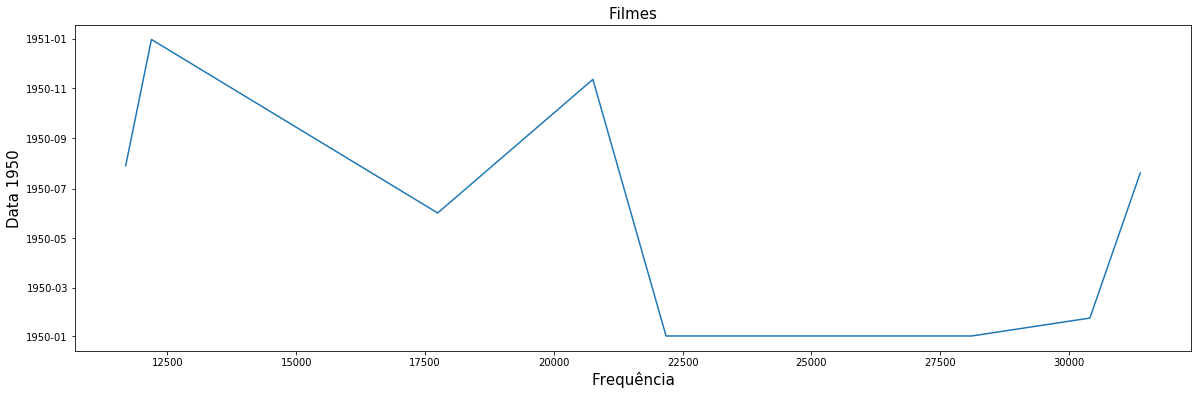

In [32]:
ano('lancamento < "1951-01-01"', 'Data 1950')

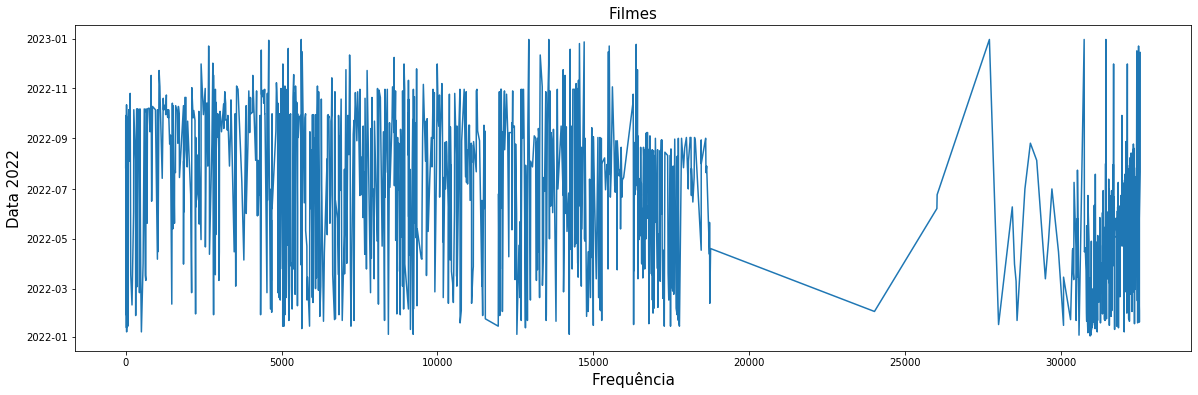

In [33]:
ano('lancamento > "2022-01-01"', 'Data 2022')

## Gráfico de barras

In [34]:
def barra(x, y, data, title):
    ax = sns.barplot(x=x, y=y, palette='GnBu_d', data = data)
    ax.set_title(title, fontsize=15)
    ax.figure.set_size_inches(12,6)
    ax.figure.set_size_inches(25,14)

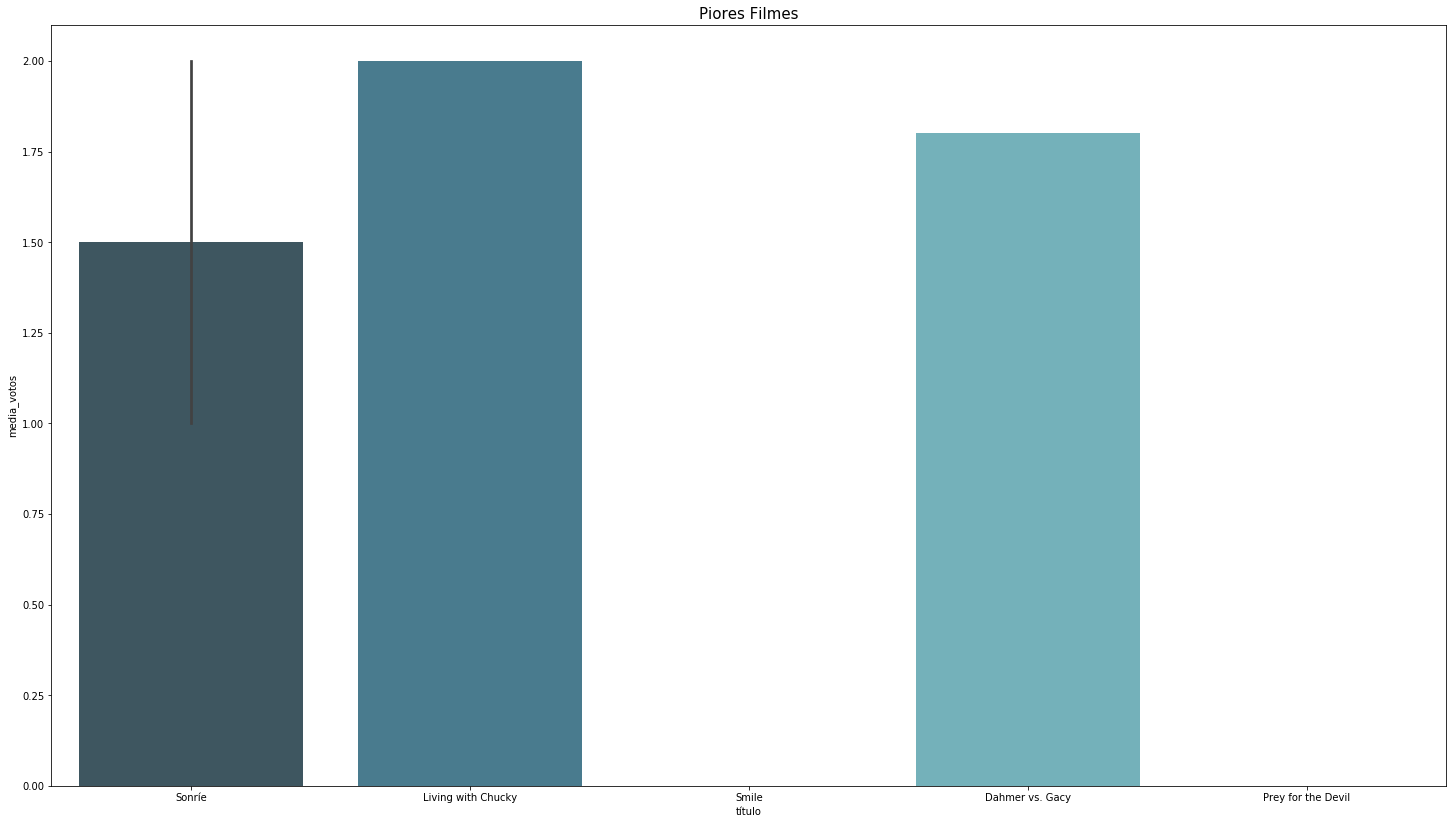

In [35]:
barra('título', 'media_votos', media_votos2, 'Piores Filmes')

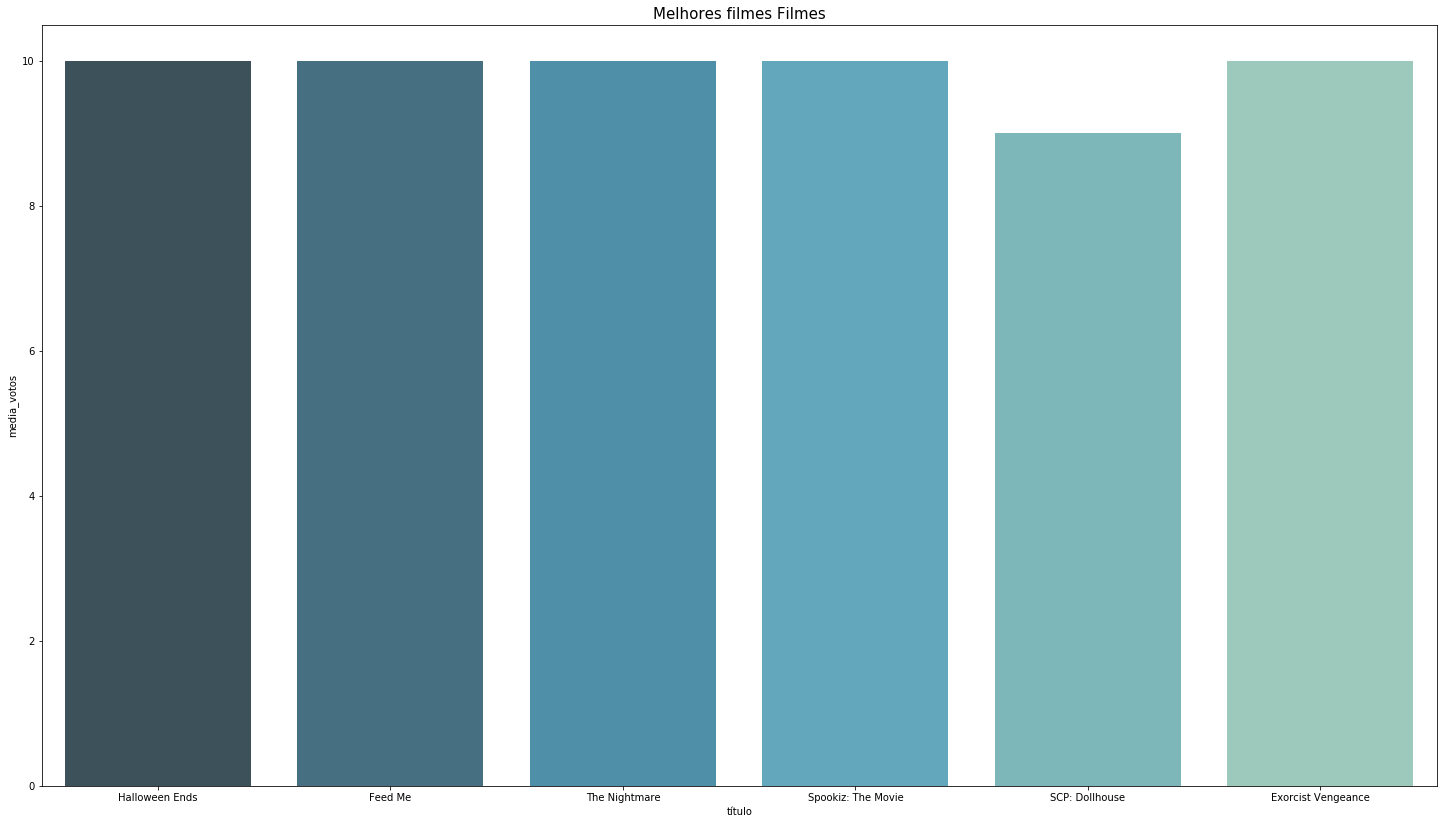

In [36]:
barra('título', 'media_votos', media_votos9, 'Melhores filmes Filmes')

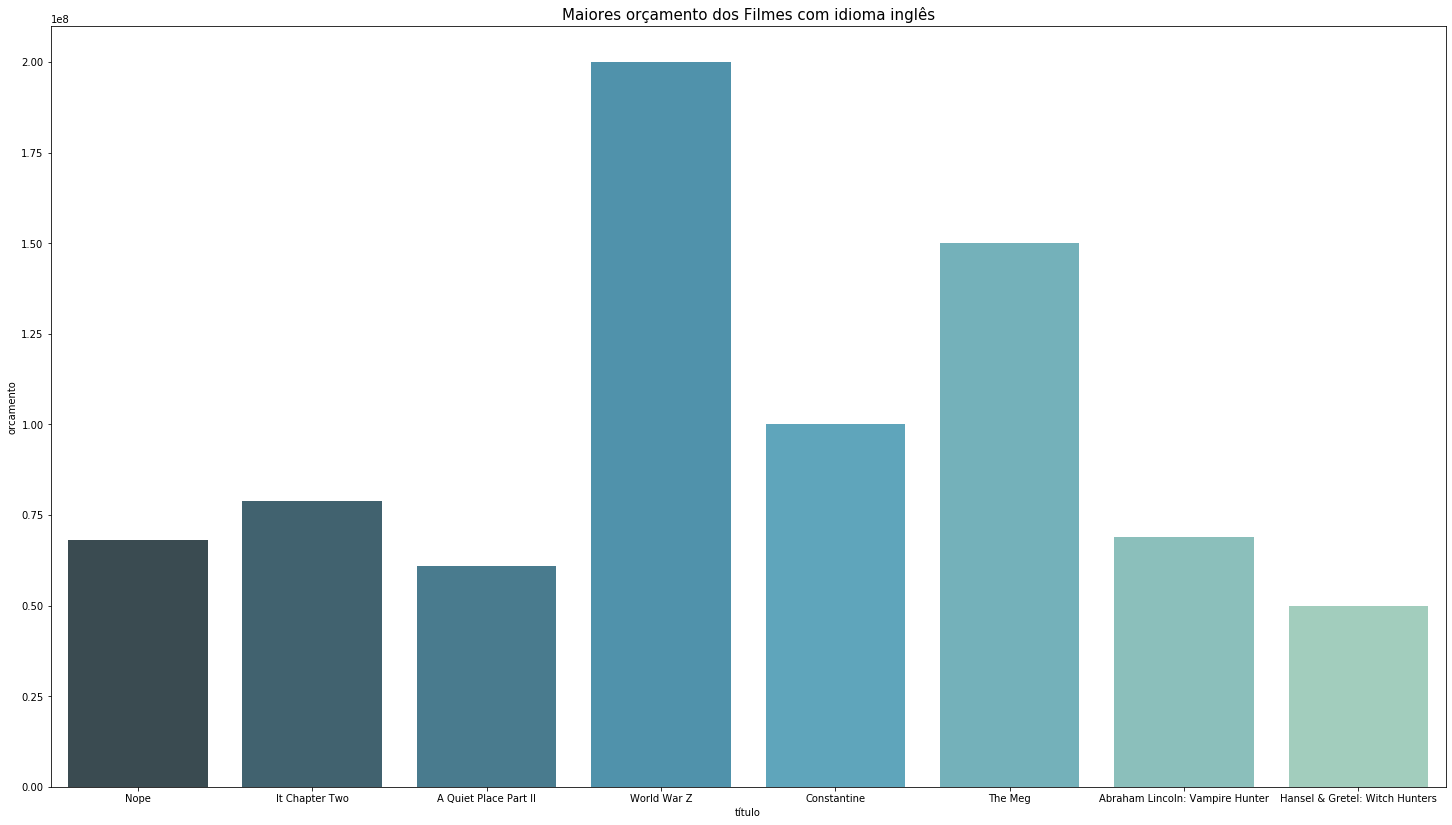

In [37]:
barra('título', 'orcamento', ingles, 'Maiores orçamento dos Filmes com idioma inglês')

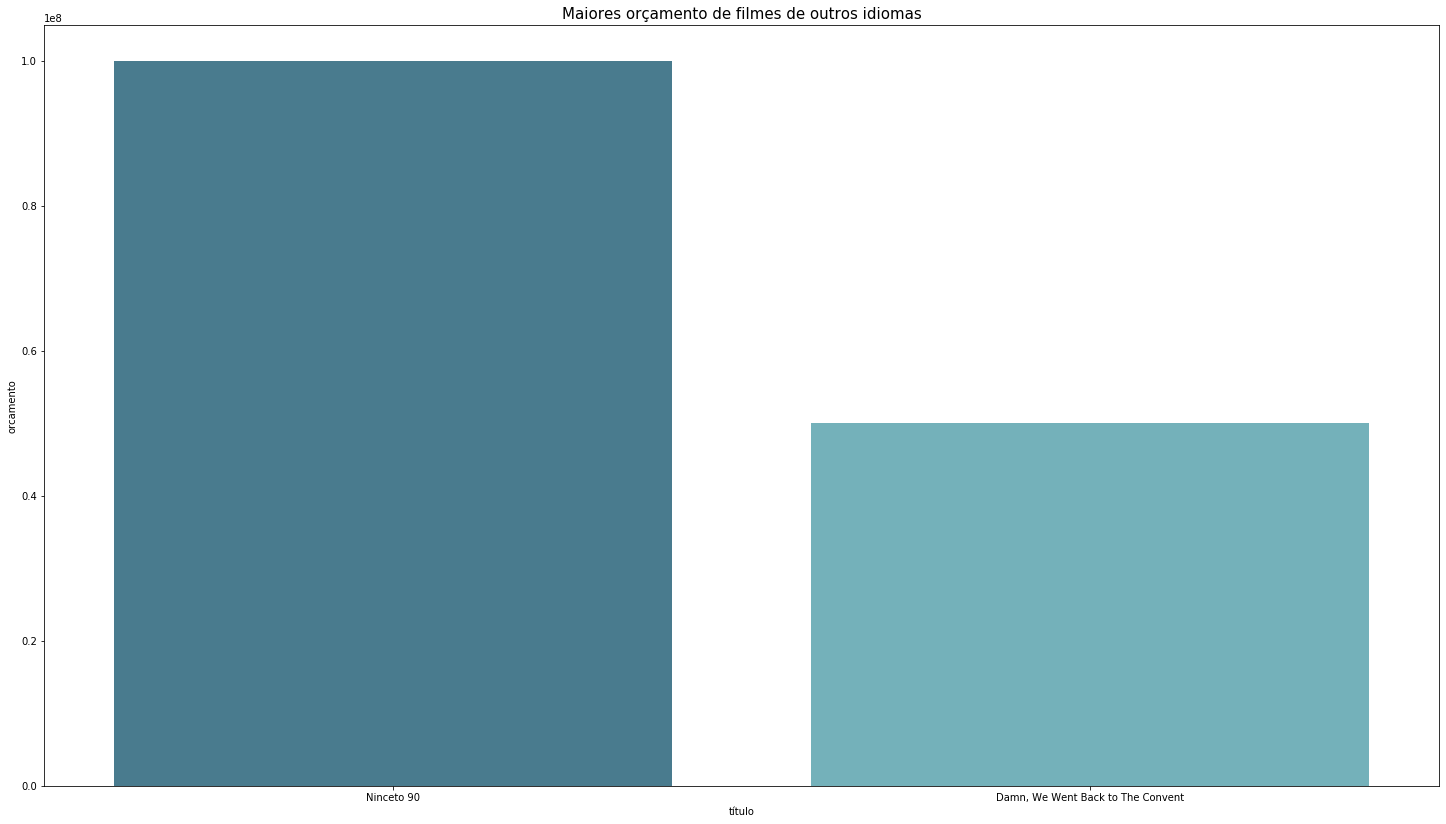

In [38]:
barra('título', 'orcamento', outras, 'Maiores orçamento de filmes de outros idiomas')

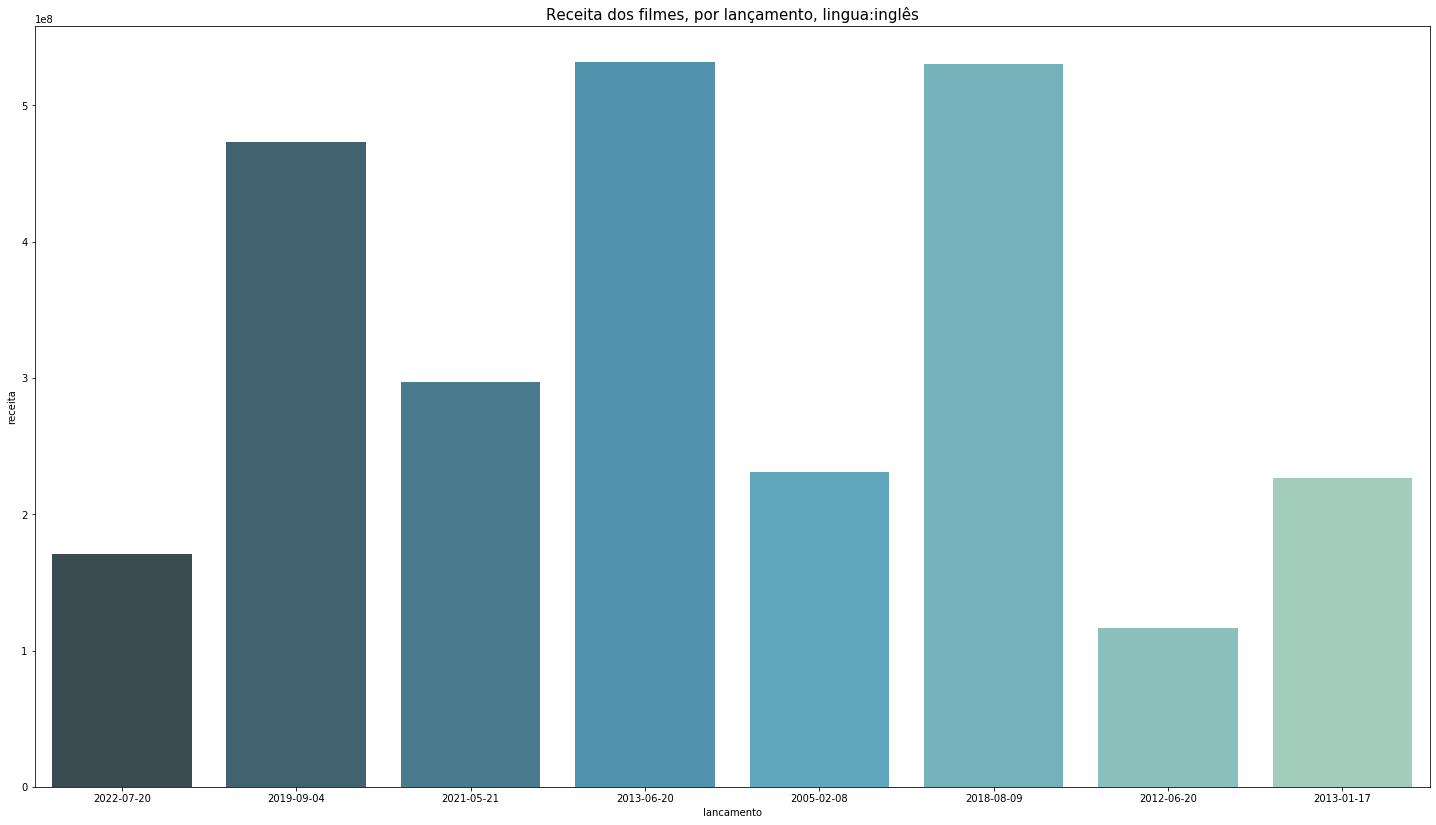

In [42]:
barra('lancamento', 'receita', ingles, 'Receita dos filmes, por lançamento, lingua:inglês')

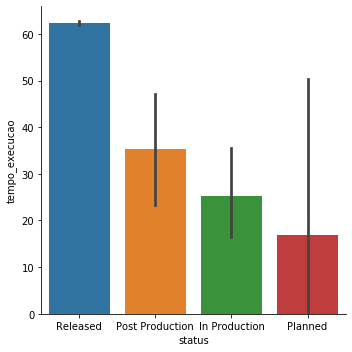

In [40]:
ax = sns.catplot(data=df, kind='bar', x='status', y='tempo_execucao')

## Verificando o orçamento p/ os filmes

In [43]:
dados['aumento'] = dados['orcamento'].diff()
dados['aceleracao'] = dados['aumento'].diff()
dados.head()

,título,idioma_original,lancamento,popularidade,contagem_votos,media_votos,orcamento,receita,tempo_execucao,status,adulto,genero,dia_semana,aumento,aceleracao
0,Orphan: First Kill,en,2022-07-27,5088.584,902,6.9,0.0,9572765.0,99,Released,False,"Horror, Thriller",Quarta,NaN,NaN
1,Beast,en,2022-08-11,2172.338,584,7.1,0.0,56000000.0,93,Released,False,"Adventure, Drama, Horror",Quinta,0.0,NaN
2,Smile,en,2022-09-23,1863.628,114,6.8,17000000.0,45000000.0,115,Released,False,"Horror, Mystery, Thriller",Sexta,17000000.0,17000000.0
3,The Black Phone,en,2022-06-22,1071.398,2736,7.9,18800000.0,161000000.0,103,Released,False,"Horror, Thriller",Quarta,1800000.0,-15200000.0
4,Presences,es,2022-09-07,1020.995,83,7.0,0.0,0.0,0,Released,False,Horror,Quarta,-18800000.0,-20600000.0


In [44]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

    ax = ax

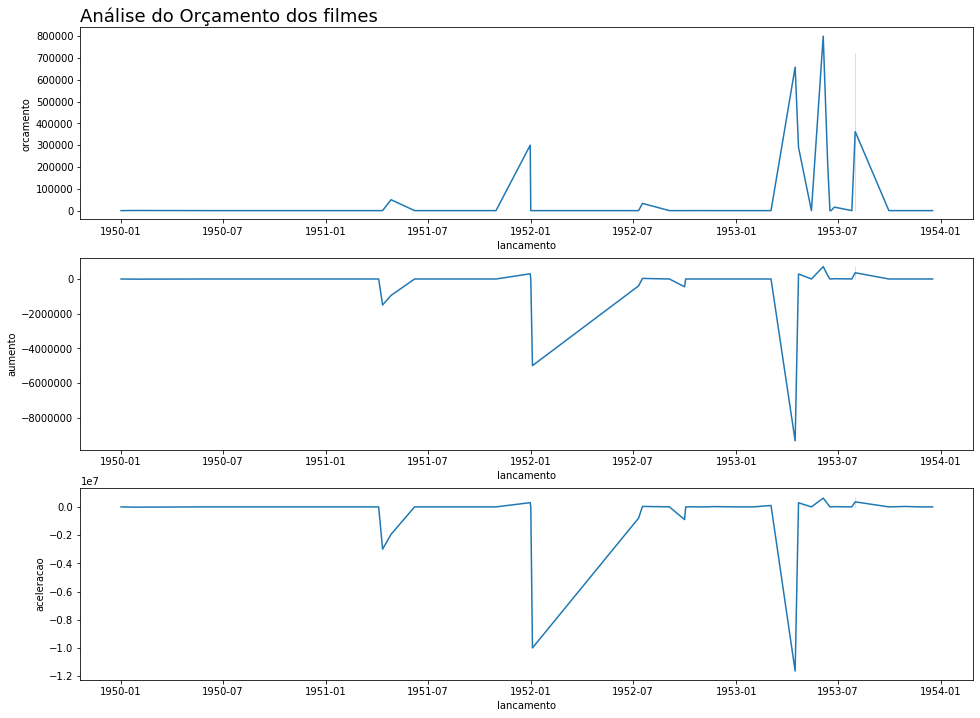

In [48]:
lancamento51 = dados.query('lancamento < "1954-01-01"')

plot_comparacao('lancamento','orcamento','aumento','aceleracao',
                lancamento51, 'Análise do Orçamento dos filmes')

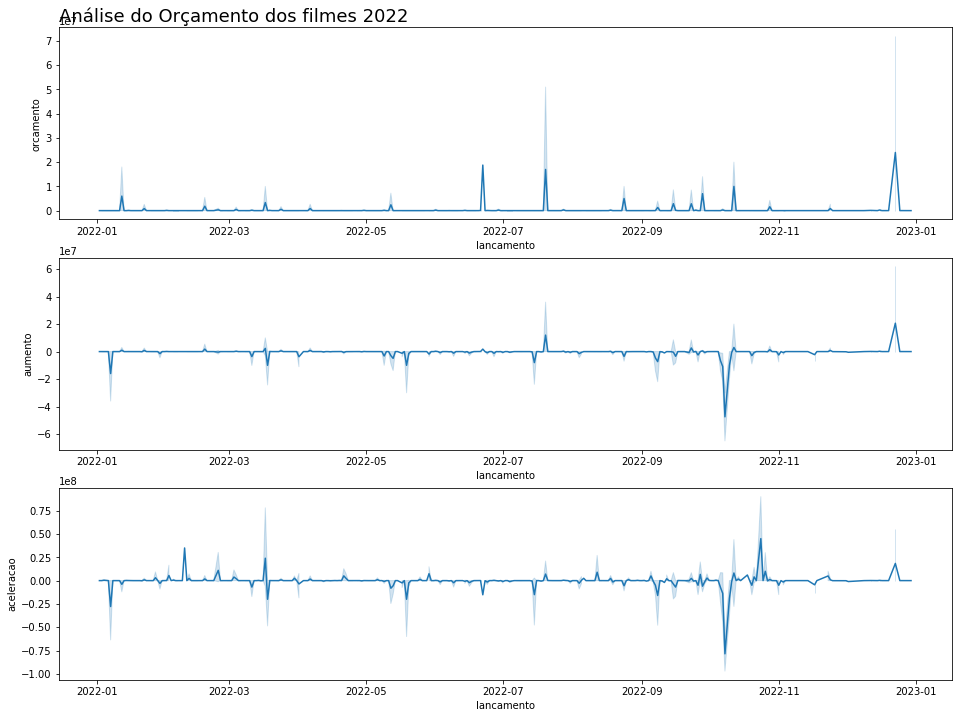

In [54]:
lancamento2021 = dados.query('lancamento > "2022-01-01" and lancamento < "2022-12-31"')

plot_comparacao('lancamento','orcamento','aumento','aceleracao',
                lancamento2021, 'Análise do Orçamento dos filmes 2022')

## Machine Learning

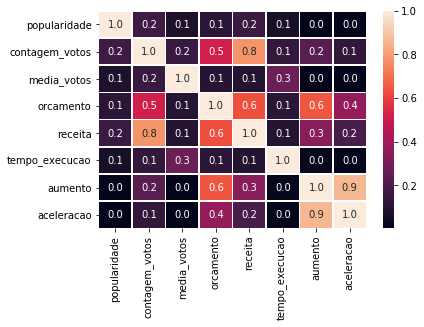

In [70]:
dados.drop(columns=['adulto'], inplace=True)
ls = dados.corr()
sns.heatmap(ls, annot=True, fmt=".1f", linewidth=.5)

In [74]:
from sklearn.preprocessing import FunctionTransformer

# Criando o modelo
ft = FunctionTransformer(np.log1p, validate=True)
transforme = ft.transform(dados.select_dtypes(exclude=['object']))


# Pegando os nomes das colunas
colunas = dados.select_dtypes(exclude=['object']).columns


# Juntando as variáveis
transforme = pd.concat([dados.select_dtypes(include=['object']), 
                              pd.DataFrame(transforme, columns=colunas)], axis=1)
transforme.head()

TypeError: invalid type promotion